In [1]:
#Kariveda Trisha
#BLEN.U4CSE21091

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Skin_Cancer_Metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
features = df[['age', 'sex', 'localization']]

In [5]:
features = pd.get_dummies(features)

In [6]:
imputer = SimpleImputer(strategy='mean') 
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

In [7]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_imputed)

In [8]:
k = 3  # or k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

C:\Users\HIMASREE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
df['cluster'] = clusters

In [10]:
import warnings
warnings.filterwarnings("ignore")


In [11]:
from scipy.spatial.distance import cdist


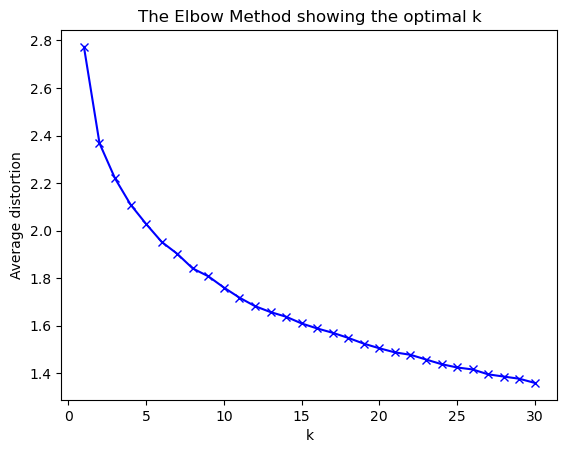

In [12]:

numeric_df = df.select_dtypes(include=[np.number])

label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

k = 3  # or k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_standardized)

df['cluster'] = clusters

distortions = []
K = range(1, 31)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_standardized)
    distortions.append(sum(np.min(cdist(df_standardized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_standardized.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


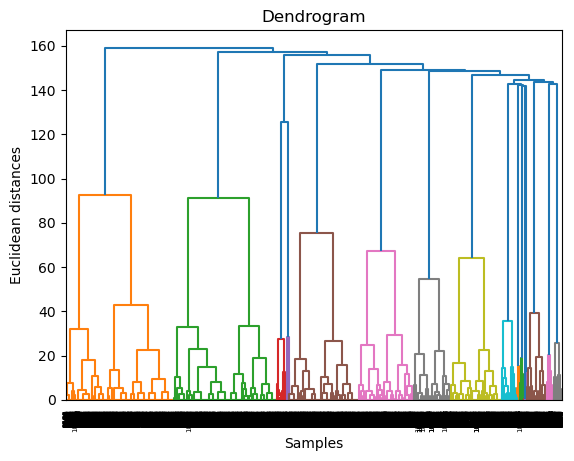

In [13]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(features_standardized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


In [14]:
#A4
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['dx'] = label_encoder.fit_transform(df['dx'])
df['dx_type'] = label_encoder.fit_transform(df['dx_type'])
df['localization'] = label_encoder.fit_transform(df['localization'])
df.to_csv('encoded_skin_cancer.csv', index=False)

In [16]:
df = pd.read_csv("encoded_skin_cancer.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,cluster
0,118,3113,2,3,80.0,1,11,2
1,118,724,2,3,80.0,1,11,2
2,2710,2463,2,3,80.0,1,11,2
3,2710,1355,2,3,80.0,1,11,2
4,1460,7327,2,3,75.0,1,4,2
...,...,...,...,...,...,...,...,...
10010,2844,8778,0,3,40.0,1,0,2
10011,2844,9244,0,3,40.0,1,0,2
10012,2844,9230,0,3,40.0,1,0,2
10013,239,8548,0,3,80.0,1,5,2


In [17]:
# Drop multiple columns
df = df.drop(['lesion_id','image_id'], axis=1)
df

,dx,dx_type,age,sex,localization,cluster
0,2,3,80.0,1,11,2
1,2,3,80.0,1,11,2
2,2,3,80.0,1,11,2
3,2,3,80.0,1,11,2
4,2,3,75.0,1,4,2
...,...,...,...,...,...,...
10010,0,3,40.0,1,0,2
10011,0,3,40.0,1,0,2
10012,0,3,40.0,1,0,2
10013,0,3,80.0,1,5,2


In [18]:
X = df.drop('dx', axis=1)
y = df['dx']

In [19]:
print(X.isnull().sum())

dx_type          0
age             57
sex              0
localization     0
cluster          0
dtype: int64


In [20]:
X['age'].mean()

51.863828077927295

In [21]:
X['age'].fillna(51.8, inplace = True)

In [22]:
print(X.isnull().sum())

dx_type         0
age             0
sex             0
localization    0
cluster         0
dtype: int64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, floating=False, scoring='accuracy',  cv=5)
                                      

sfs = sfs.fit(X_train, y_train)

print("Selected feature indices:", sfs.k_feature_idx_)

X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

print(X_train_selected)

Selected feature indices: (0, 1, 2, 3, 4)
[[ 2. 35.  0.  2.  0.]
 [ 3. 75.  1. 14.  1.]
 [ 1. 40.  1. 13.  1.]
 ...
 [ 2. 45.  0.  9.  0.]
 [ 1. 55.  0.  3.  0.]
 [ 3. 85.  0.  2.  0.]]


Number of components needed to capture 95% of variance: 5


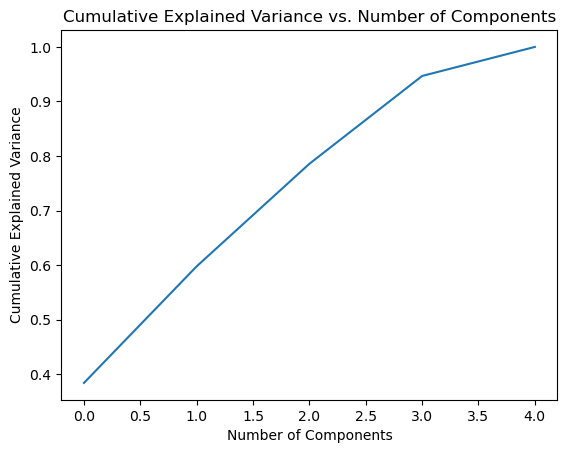

In [24]:
#A5
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_selected_scaled)


cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Number of components needed to capture 95% of variance: {n_components_95}")

import matplotlib.pyplot as plt

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

In [25]:
#A6
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA(n_components=n_components_95) 
X_train_pca = pca.fit_transform(X_train)
X_train_pca_df = pd.DataFrame(X_train_pca, index=y_train.index)

print("X_train_pca_df shape:", X_train_pca_df.shape)
print("y_train shape:", y_train.shape)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_train_pca_df, y_train, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set using {n_components_95} principal components: {accuracy:.2f}")

X_train_pca_df shape: (8012, 5)
y_train shape: (8012,)
Accuracy on the test set using 5 principal components: 0.79
